In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.describe()

,Unnamed: 0,Year,Length,Market Share_total,Temperature in Montreal during episode
count,616656.000000,616656.000000,616656.000000,616656.000000,533312.000000
mean,308328.500000,2017.381420,3.203963,3.011562,6.707428
std,178013.398136,0.751344,5.306656,4.919562,12.178492
min,1.000000,2016.000000,0.000000,0.000000,-27.425000
25%,154164.750000,2017.000000,2.000000,0.400000,-1.562500
50%,308328.500000,2017.000000,2.000000,1.400000,6.450000
75%,462492.250000,2018.000000,4.000000,3.400000,17.050000
max,616656.000000,2019.000000,92.000000,89.500000,34.950000


In [4]:
df.head()

,Unnamed: 0,Episode,Station,Channel Type,Season,Year,Date,Day of week,Start_time,End_time,Length,Name of show,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total,Temperature in Montreal during episode
0,1,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,NaN,Music Video Clips,No,Yes,No,No,0.9,20.400
1,2,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,NaN,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125
2,3,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,Infopublicité,NaN,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125
3,4,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,"Infos, Les",NaN,News,No,Yes,No,No,1.7,18.125
4,5,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,"Souper presque parfait, Un",NaN,Reality Programs,No,Yes,No,No,2.2,18.250


In [5]:
df.shape

(616656, 20)

In [6]:
#sns.heatmap(df.isna())

In [7]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Episode,Station,Channel Type,Season,Year,Date,Day of week,Start_time,End_time,Length,Name of show,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total,Temperature in Montreal during episode
0,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,NaN,Music Video Clips,No,Yes,No,No,0.9,20.400
1,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,NaN,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125
2,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,Infopublicité,NaN,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125
3,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,"Infos, Les",NaN,News,No,Yes,No,No,1.7,18.125
4,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,"Souper presque parfait, Un",NaN,Reality Programs,No,Yes,No,No,2.2,18.250


In [8]:
df = df.drop('Name of episode', axis=1)
df = df.dropna()

In [9]:
df['Season'].value_counts().index

Index(['Fall', 'Winter', 'Summer', 'Spring'], dtype='object')

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizerE = CountVectorizer()
vectorizerN = CountVectorizer()

In [11]:
E = vectorizerE.fit_transform(df['Episode'])
df['Episode'] = E.todense()

In [12]:
N = vectorizerN.fit_transform(df['Name of show'])
df['Name of show'] = N.todense()

In [13]:
d_station = df['Station'].value_counts().index
i_station = []
for i in range(len(d_station)):
    i_station.append(i)
d = dict(zip(d_station, i_station))
df['Station'] = df['Station'].map(d)

In [14]:
d_station = df['Channel Type'].value_counts().index
i_station = []
for i in range(len(d_station)):
    i_station.append(i)
d = dict(zip(d_station, i_station))
df['Channel Type'] = df['Channel Type'].map(d)

In [15]:
d_station = df['Season'].value_counts().index
i_station = []
for i in range(len(d_station)):
    i_station.append(i)
d = dict(zip(d_station, i_station))
df['Season'] = df['Season'].map(d)

In [16]:
d_station = df['Day of week'].value_counts().index
i_station = []
for i in range(len(d_station)):
    i_station.append(i)
d = dict(zip(d_station, i_station))
df['Day of week'] = df['Day of week'].map(d)

In [17]:
d_station = df['Genre'].value_counts().index
i_station = []
for i in range(len(d_station)):
    i_station.append(i)
d = dict(zip(d_station, i_station))
df['Genre'] = df['Genre'].map(d)

In [18]:
d_station = df['First time or rerun'].value_counts().index
i_station = []
for i in range(len(d_station)):
    i_station.append(i)
d = dict(zip(d_station, i_station))
df['First time or rerun'] = df['First time or rerun'].map(d)

In [19]:
d_station = df['# of episode in the season'].value_counts().index
i_station = []
for i in range(len(d_station)):
    i_station.append(i)
d = dict(zip(d_station, i_station))
df['# of episode in the season'] = df['# of episode in the season'].map(d)

In [20]:
d_station = df['Movie?'].value_counts().index
i_station = []
for i in range(len(d_station)):
    i_station.append(i)
d = dict(zip(d_station, i_station))
df['Movie?'] = df['Movie?'].map(d)

In [21]:
d_station = df['Game of the Canadiens during episode?'].value_counts().index
i_station = []
for i in range(len(d_station)):
    i_station.append(i)
d = dict(zip(d_station, i_station))
df['Game of the Canadiens during episode?'] = df['Game of the Canadiens during episode?'].map(d)

In [22]:
df['Date'].replace(regex=True,inplace=True,to_replace=r'-',value=r'')
df['Start_time'].replace(regex=True,inplace=True,to_replace=r'-',value=r'')
df['End_time'].replace(regex=True,inplace=True,to_replace=r'-',value=r'')

df['Start_time'].replace(regex=True,inplace=True,to_replace=r':',value=r'')
df['End_time'].replace(regex=True,inplace=True,to_replace=r':',value=r'')

df['Start_time'].replace(regex=True,inplace=True,to_replace=r' ',value=r'')
df['End_time'].replace(regex=True,inplace=True,to_replace=r' ',value=r'')

In [23]:
df.head()

,Episode,Station,Channel Type,Season,Year,Date,Day of week,Start_time,End_time,Length,Name of show,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total,Temperature in Montreal during episode
0,0,16,1,0,2016,20160829,2,20160829060000,20160829080000,8,0,25,0,0,0,0,0.9,20.400
1,0,16,1,0,2016,20160829,2,20160829080000,20160829083000,2,0,5,0,0,0,0,0.5,19.125
2,0,16,1,0,2016,20160829,2,20160829083000,20160829090000,2,0,14,0,0,0,0,0.3,19.125
3,0,16,1,0,2016,20160829,2,20160829090000,20160829100000,4,0,2,0,0,0,0,1.7,18.125
4,0,16,1,0,2016,20160829,2,20160829100000,20160829103000,2,0,1,0,0,0,0,2.2,18.250


In [24]:
df = df.dropna()

y = df['Market Share_total']
x = df.drop('Market Share_total', axis=1)

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
x = min_max_scaler.fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=101)

In [27]:
x_train, x_test, y_train, y_test = np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation
import tensorflow as tf

model = Sequential()
model.add(Dense(2048, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam',loss='mae')

with tf.device('/GPU:0'):
    model.fit(x=x_train,
              y=y_train,
              batch_size=10000,
              epochs=100,
              validation_data=(x_test,y_test))

Train on 506646 samples, validate on 26666 samples
Epoch 1/100
506646/506646 [==============================] - 6s 11us/sample - loss: 2.2033 - val_loss: 2.0815
Epoch 2/100
506646/506646 [==============================] - 2s 5us/sample - loss: 2.0467 - val_loss: 2.0446
Epoch 3/100
506646/506646 [==============================] - 2s 5us/sample - loss: 2.0001 - val_loss: 1.9843
Epoch 4/100
506646/506646 [==============================] - 2s 5us/sample - loss: 1.9239 - val_loss: 1.8971
Epoch 5/100
506646/506646 [==============================] - 2s 5us/sample - loss: 1.8578 - val_loss: 1.8876
Epoch 6/100
506646/506646 [==============================] - 2s 5us/sample - loss: 1.8156 - val_loss: 1.8369
Epoch 7/100
506646/506646 [==============================] - 2s 5us/sample - loss: 1.7652 - val_loss: 1.8901
Epoch 8/100
506646/506646 [==============================] - 2s 5us/sample - loss: 1.7250 - val_loss: 1.7671
Epoch 9/100
506646/506646 [==============================] - 2s 5us/sample -

Epoch 75/100
506646/506646 [==============================] - 2s 5us/sample - loss: 1.3279 - val_loss: 1.3723
Epoch 76/100
506646/506646 [==============================] - 2s 5us/sample - loss: 1.3318 - val_loss: 1.3693
Epoch 77/100
506646/506646 [==============================] - 2s 5us/sample - loss: 1.3340 - val_loss: 1.3795
Epoch 78/100
506646/506646 [==============================] - 2s 5us/sample - loss: 1.3299 - val_loss: 1.3657
Epoch 79/100
506646/506646 [==============================] - 2s 5us/sample - loss: 1.3278 - val_loss: 1.3866
Epoch 80/100
506646/506646 [==============================] - 2s 5us/sample - loss: 1.3338 - val_loss: 1.3814
Epoch 81/100
506646/506646 [==============================] - 2s 5us/sample - loss: 1.3308 - val_loss: 1.3613
Epoch 82/100
506646/506646 [==============================] - 2s 5us/sample - loss: 1.3243 - val_loss: 1.3621
Epoch 83/100
506646/506646 [==============================] - 2s 5us/sample - loss: 1.3253 - val_loss: 1.3605
Epoch 84/1

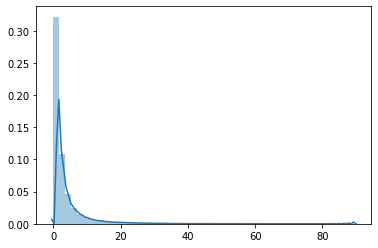

In [29]:
sns.distplot(y_train)

In [30]:
from sklearn.metrics import r2_score

In [31]:
y_pred = model.predict(x_test)

In [32]:
r = r2_score(y_test, y_pred)
print(r)

0.7364097554410083
